In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.4.2'

In [3]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-06.parquet')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-06-01 00:03:46,2024-06-01 00:31:23,1.0,12.50,1.0,N,138,195,1,48.5,7.75,0.5,11.55,0.0,1.0,69.30,0.0,1.75
1,2,2024-06-01 00:55:22,2024-06-01 01:08:24,1.0,4.34,1.0,N,138,7,1,20.5,6.00,0.5,8.40,0.0,1.0,38.15,0.0,1.75
2,1,2024-06-01 00:23:53,2024-06-01 00:32:35,1.0,1.30,1.0,N,166,41,1,10.0,1.00,0.5,3.10,0.0,1.0,15.60,0.0,0.00
3,1,2024-06-01 00:32:24,2024-06-01 00:40:06,1.0,1.20,1.0,N,148,114,1,8.6,3.50,0.5,0.20,0.0,1.0,13.80,2.5,0.00
4,1,2024-06-01 00:51:38,2024-06-01 00:58:17,1.0,1.00,1.0,N,148,249,1,7.2,3.50,0.5,2.00,0.0,1.0,14.20,2.5,0.00


In [5]:
import sklearn

In [6]:
sklearn.__version__

'1.0.2'

## Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.


## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?

* 16
* 17
* 18
* 19

In [7]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

In [8]:
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet')

In [9]:
print(f'January dataframe has {len(df_jan.columns)} columns.')

January dataframe has 19 columns.


## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

* 32.59
* 42.59
* 52.59
* 62.59

In [10]:
df_jan['duration'] = (df_jan['tpep_dropoff_datetime'] - df_jan['tpep_pickup_datetime']).dt.total_seconds()/60

In [11]:
print(f'The standart deviation for the variable "duration" is {df_jan["duration"].std():.2f}.')

The standart deviation for the variable "duration" is 34.85.


## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* 98%

In [12]:
df_jan_no_outliers = df_jan[df_jan['duration'] <= 60]
print(f'After treating our data, the remaining data represents {len(df_jan_no_outliers) / len(df_jan)*100:.2f}% of the original data.')

After treating our data, the remaining data represents 98.97% of the original data.


## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will 
  label encode them)
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

* 2
* 155
* 345
* 515
* 715

In [13]:
df_jan_no_outliers['PULocationID'].nunique()

259

In [14]:
df_jan_no_outliers['DOLocationID'].nunique()

261

In [15]:
df_jan_no_outliers[['PULocationID', 'DOLocationID']] = df_jan_no_outliers[['PULocationID', 'DOLocationID']].astype(str)
dict_ohe_jan = df_jan_no_outliers[['PULocationID', 'DOLocationID']].to_dict('records')
dict_ohe_jan

/tmp/ipykernel_10933/1878366082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_no_outliers[['PULocationID', 'DOLocationID']] = df_jan_no_outliers[['PULocationID', 'DOLocationID']].astype(str)


[{'PULocationID': '186', 'DOLocationID': '79'},
 {'PULocationID': '140', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '79'},
 {'PULocationID': '79', 'DOLocationID': '211'},
 {'PULocationID': '211', 'DOLocationID': '148'},
 {'PULocationID': '148', 'DOLocationID': '141'},
 {'PULocationID': '138', 'DOLocationID': '181'},
 {'PULocationID': '246', 'DOLocationID': '231'},
 {'PULocationID': '161', 'DOLocationID': '261'},
 {'PULocationID': '113', 'DOLocationID': '113'},
 {'PULocationID': '107', 'DOLocationID': '137'},
 {'PULocationID': '158', 'DOLocationID': '246'},
 {'PULocationID': '246', 'DOLocationID': '190'},
 {'PULocationID': '68', 'DOLocationID': '90'},
 {'PULocationID': '90', 'DOLocationID': '68'},
 {'PULocationID': '132', 'DOLocationID': '216'},
 {'PULocationID': '164', 'DOLocationID': '79'},
 {'PULocationID': '237', 'DOLocationID': '237'},
 {'PULocationID': '141', 'DOLocationID': '263'},
 {'PULocationID': '161', 'DOLocationID': '263'},
 {'PULocationID': '263', 'DO

In [16]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()

In [17]:
X_train = v.fit_transform(dict_ohe_jan)

In [18]:
print(f'The number of columns is {X_train.shape[1]}.')

The number of columns is 520.


## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters, where duration is the response variable
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 3.64
* 7.64
* 11.64
* 16.64

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
y_train = df_jan_no_outliers['duration'].values

reg = LinearRegression().fit(X_train, y_train)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
y_pred_train = reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f'The RMSE on train dataset (January) was {rmse_train:.2f}.')

The RMSE on train dataset (January) was 8.24.


### Visualizing

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


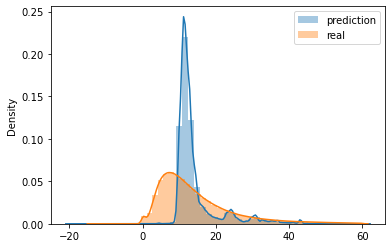

In [24]:
sns.distplot(y_pred_train, label='prediction')
sns.distplot(y_train, label='real')

plt.legend();

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023). 

What's the RMSE on validation?

* 3.81
* 7.81
* 11.81
* 16.81

In [25]:
df_feb['duration'] = (df_feb['tpep_dropoff_datetime'] - df_feb['tpep_pickup_datetime']).dt.total_seconds()/60
df_feb_no_outliers = df_feb[df_feb['duration'] <= 60]

df_feb_no_outliers[['PULocationID', 'DOLocationID']] = df_feb_no_outliers[['PULocationID', 'DOLocationID']].astype(str)
dict_ohe_feb = df_feb_no_outliers[['PULocationID', 'DOLocationID']].to_dict('records')

X_test = v.transform(dict_ohe_feb)

/tmp/ipykernel_10933/1709405518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feb_no_outliers[['PULocationID', 'DOLocationID']] = df_feb_no_outliers[['PULocationID', 'DOLocationID']].astype(str)


In [26]:
y_test = df_feb_no_outliers['duration'].values

y_pred_test = reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'The RMSE on test dataset (February) was {rmse_test:.2f}.')

The RMSE on test dataset (February) was 8.39.


### Visualizing

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


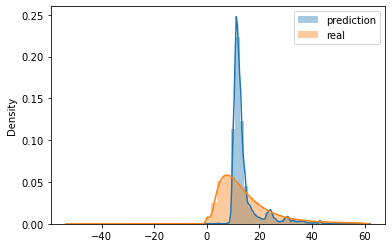

In [27]:
sns.distplot(y_pred_test, label='prediction')
sns.distplot(y_test, label='real')

plt.legend();